In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import read_log

In [3]:
def clean_list(lis):
    return [el for el in lis if el != '']

In [4]:
def update_volatility(prices):
    lambda_=0.94
    vol_floor=0.5
    if len(prices) < 2:
        return vol_floor
    log_returns = np.diff(np.log(prices))
    squared_returns = log_returns**2
    weights = (1 - lambda_) * lambda_**np.arange(len(squared_returns))[::-1]
    ewma_vol = np.sqrt(np.sum(weights * squared_returns))
    return max(ewma_vol, vol_floor)

In [5]:
def avellaneda_stoikov_reservation_price(price, position, volatility):
    gamma = 0.2  # risk aversion
    spread = 1

    reservation_price = price - position * gamma * volatility**2
    return reservation_price

# Website

In [15]:
sandbox, activities, trades = read_log('../data/logs/round_4/77fd41eb-a05e-4521-8a69-2ee522fbeaca.log')

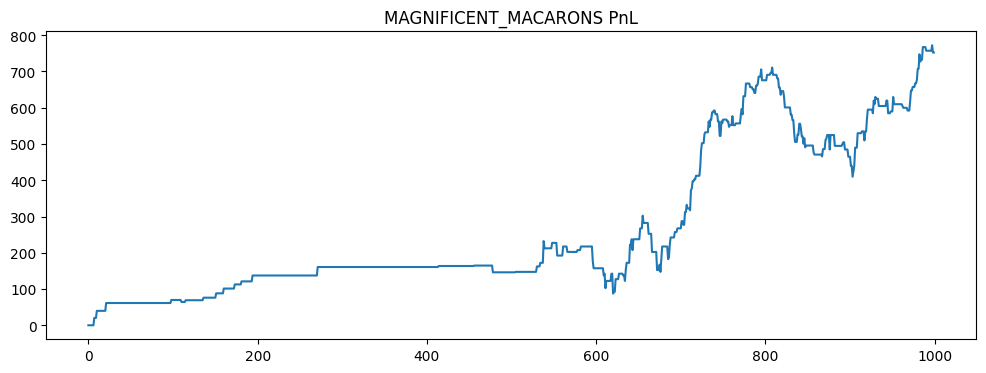

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'MAGNIFICENT_MACARONS']['profit_and_loss'].to_numpy())
plt.title('MAGNIFICENT_MACARONS PnL')
plt.show()

In [17]:
activities[activities['product'] == 'MAGNIFICENT_MACARONS']['profit_and_loss'].to_numpy()[-1]

np.float64(752.3017578125)

In [18]:
edges = sandbox['lambdaLog'].apply(lambda x: float(str(x).split('\n')[2].split(': ')[1])).to_numpy()
edges

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

In [19]:
positions = sandbox['lambdaLog'].apply(lambda x: int(str(x).split('\n')[0].split(': ')[1])).to_numpy()
positions

array([  0,   0,   0,   0,   0,   0,   0,  -7,   0,   0,  -5,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  -4,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  -6,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  -5,   0,   0,   0,   0,  -2,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  -5,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  -5,   0,   0,   0,   0,
         0,   0,   0,   0,  -3,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  -6,   0,   0,   0,   0,   0,   0,   

In [20]:
conversions = sandbox['lambdaLog'].apply(lambda x: int(str(x).split('\n')[1].split(': ')[1])).to_numpy()
conversions

array([ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  5,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [21]:
(conversions != -positions).sum()

np.int64(0)

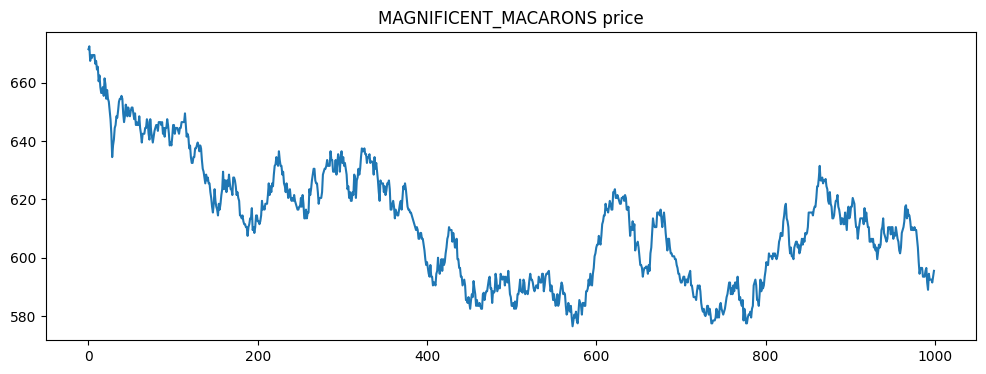

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'MAGNIFICENT_MACARONS']['mid_price'].to_numpy())
plt.title('MAGNIFICENT_MACARONS price')
plt.show()

In [6]:
buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()

C:\Users\aeali\AppData\Local\Temp\ipykernel_37076\1531186028.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
C:\Users\aeali\AppData\Local\Temp\ipykernel_37076\1531186028.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()


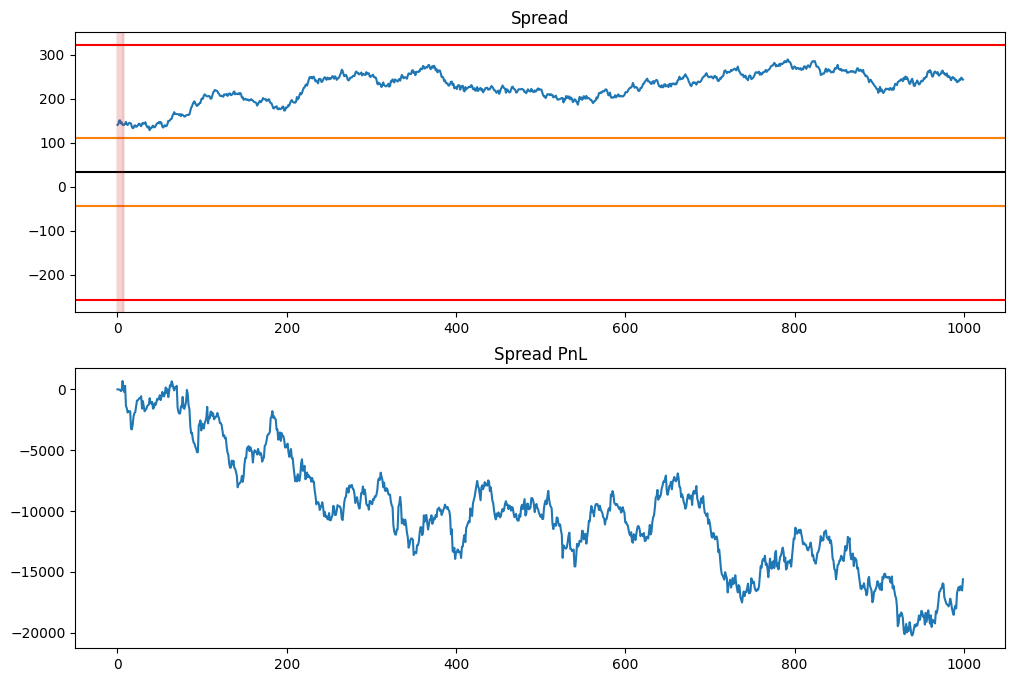

In [7]:
spr = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

spr_pnl = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() -
        activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(spr)
ax[0].axhline(32.9, c='k')
ax[0].axhline(32.9 + 0.8 * 96.4, c='tab:orange')
ax[0].axhline(32.9 - 0.8 * 96.4, c='tab:orange')
ax[0].axhline(32.9 + 3 * 96.4, c='r')
ax[0].axhline(32.9 - 3 * 96.4, c='r')
for b in buys:
    ax[0].axvline(b, c='tab:green', alpha=0.1)
for s in sells:
    ax[0].axvline(s, c='tab:red', alpha=0.1)
ax[1].plot(spr_pnl)
ax[0].set_title('Spread')
ax[1].set_title('Spread PnL')
plt.show()

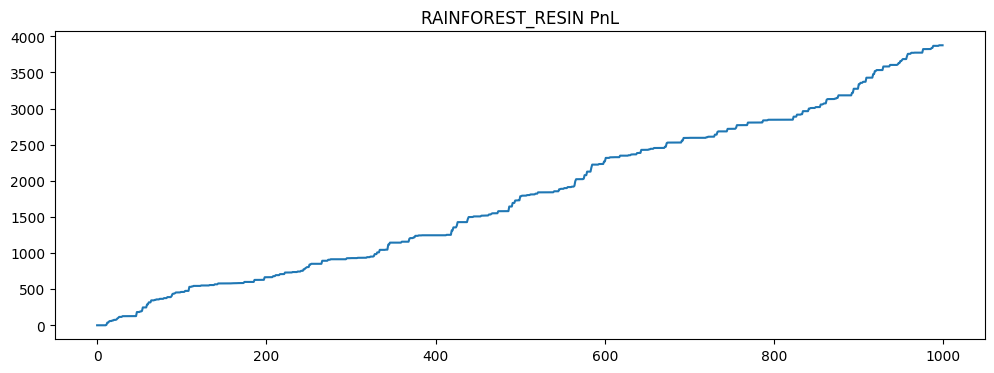

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'RAINFOREST_RESIN']['profit_and_loss'].to_numpy())
plt.title('RAINFOREST_RESIN PnL')
plt.show()

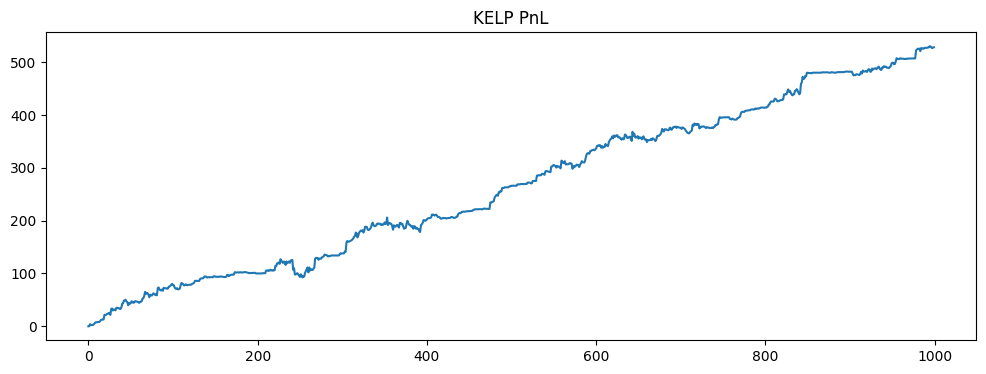

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'KELP']['profit_and_loss'].to_numpy())
plt.title('KELP PnL')
plt.show()

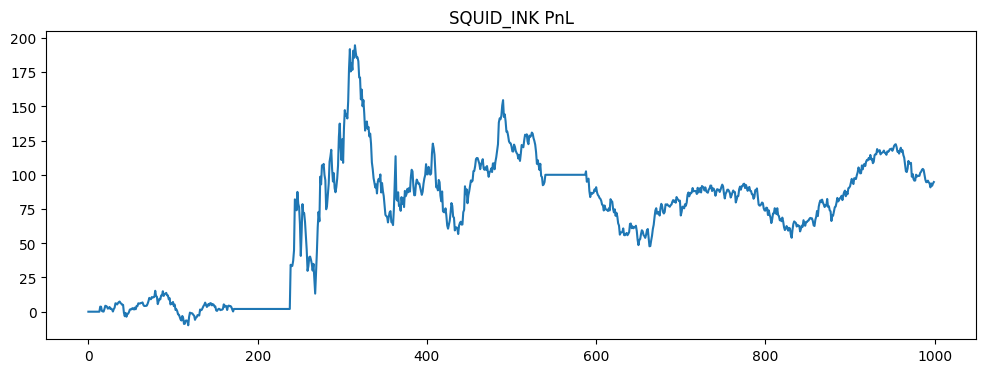

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['profit_and_loss'].to_numpy())
plt.title('SQUID_INK PnL')
plt.show()

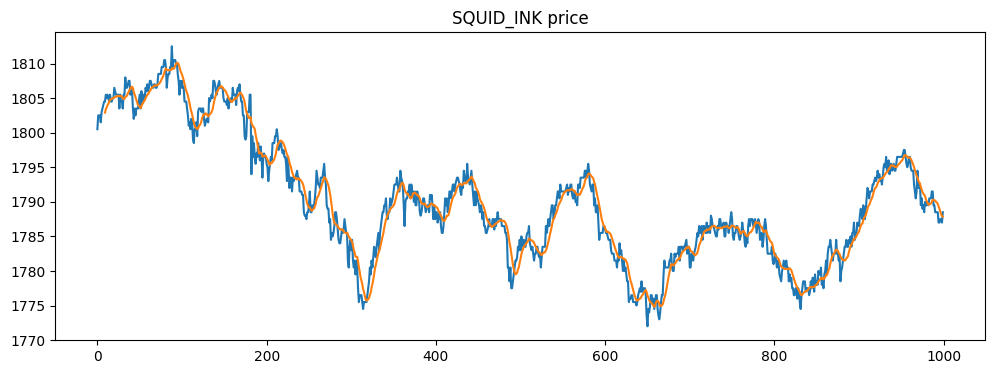

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['mid_price'].to_numpy())
plt.plot(activities[activities['product'] == 'SQUID_INK']['mid_price'].rolling(10).mean().to_numpy())
plt.title('SQUID_INK price')
plt.show()

# Final

In [6]:
sandbox, activities, trades = read_log('../data/logs/round_4/235590fb-d5ca-4a45-b934-cc4f5e623610_final.log')

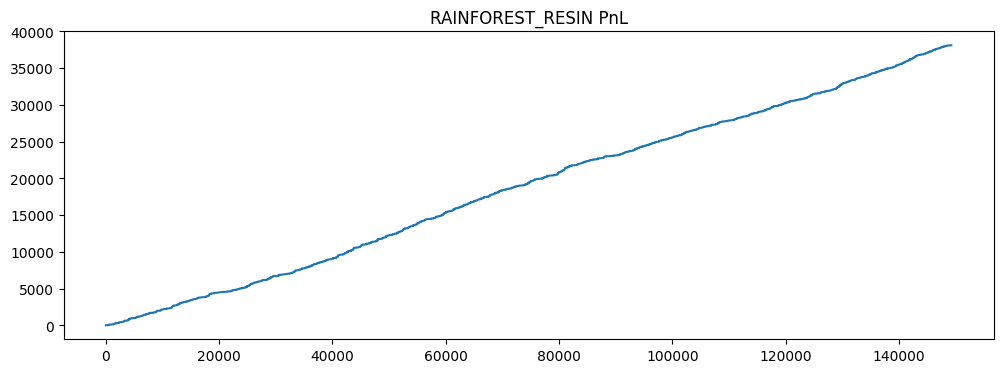

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'RAINFOREST_RESIN']['profit_and_loss'])
plt.title('RAINFOREST_RESIN PnL')
plt.show()

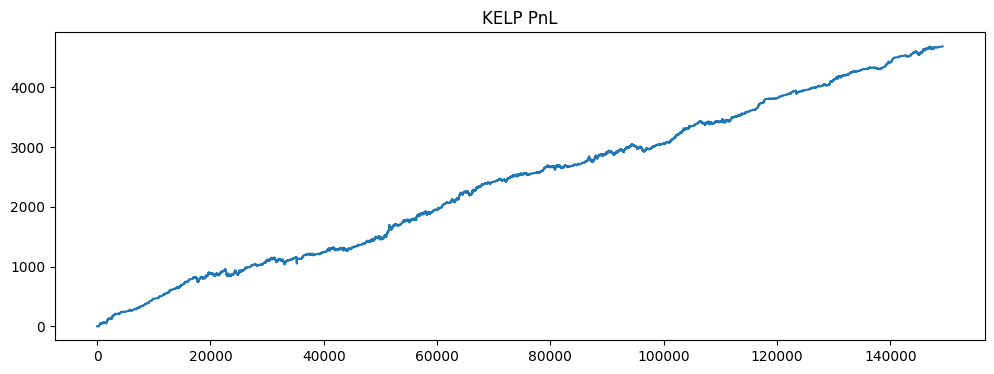

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'KELP']['profit_and_loss'])
plt.title('KELP PnL')
plt.show()

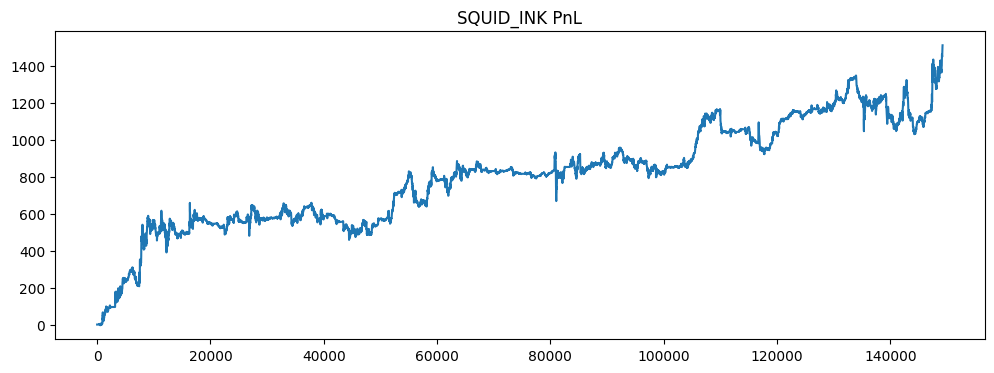

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['profit_and_loss'])
plt.title('SQUID_INK PnL')
plt.show()

In [10]:
spr1 = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        6 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        3 * activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

spr2 = pd.Series(activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        4 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'JAMS']['mid_price'].to_numpy())

spr3 = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

spr_pnl = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())

In [12]:
buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()

C:\Users\aeali\AppData\Local\Temp\ipykernel_27272\1531186028.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
C:\Users\aeali\AppData\Local\Temp\ipykernel_27272\1531186028.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()


Text(0.5, 1.0, 'Spread PnL')

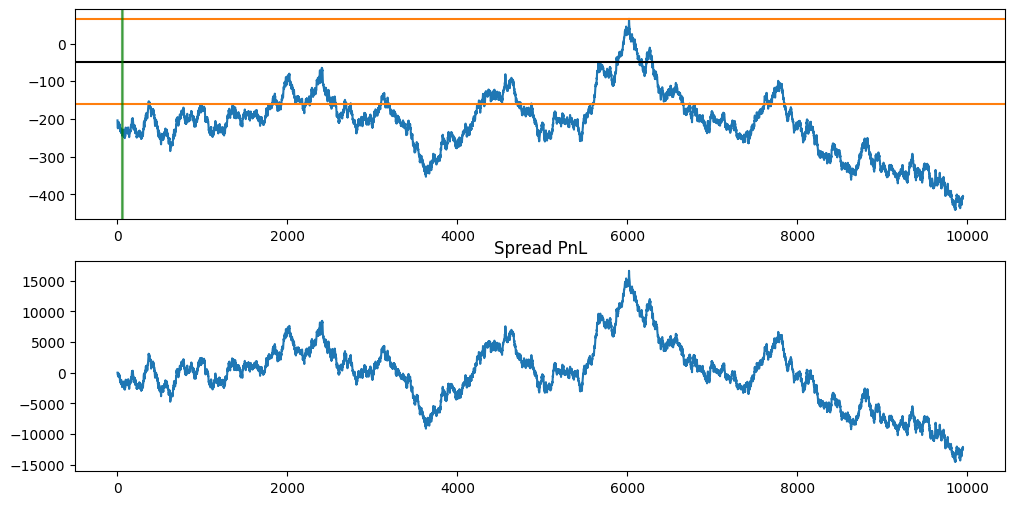

In [18]:
mean = -47.8
std = 140.1

fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(spr3)
ax[0].axhline(mean, c='k')
ax[0].axhline(mean + 0.8 * std, c='tab:orange')
ax[0].axhline(mean - 0.8 * std, c='tab:orange')
for b in buys:
    ax[0].axvline(b, c='g', alpha=0.1)
for s in sells:
    ax[0].axvline(s, c='r', alpha=0.1)
ax[1].plot(spr_pnl)
ax[1].set_title('Spread PnL')

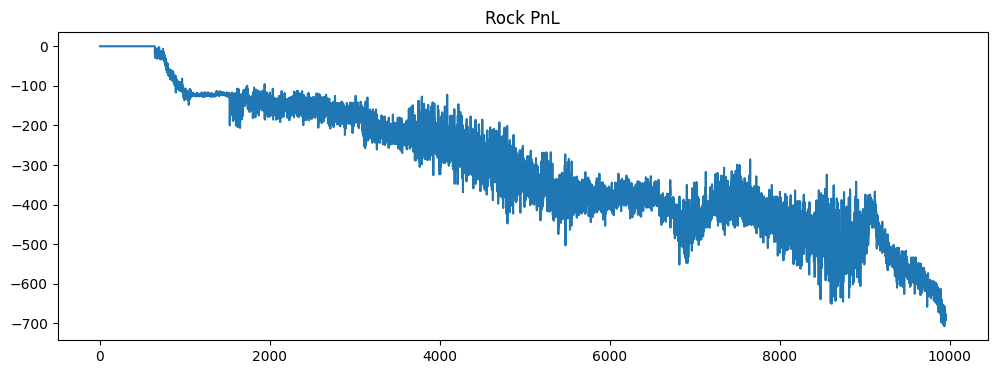

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9750']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']['profit_and_loss'].to_numpy())
plt.title('Rock PnL')
plt.show()

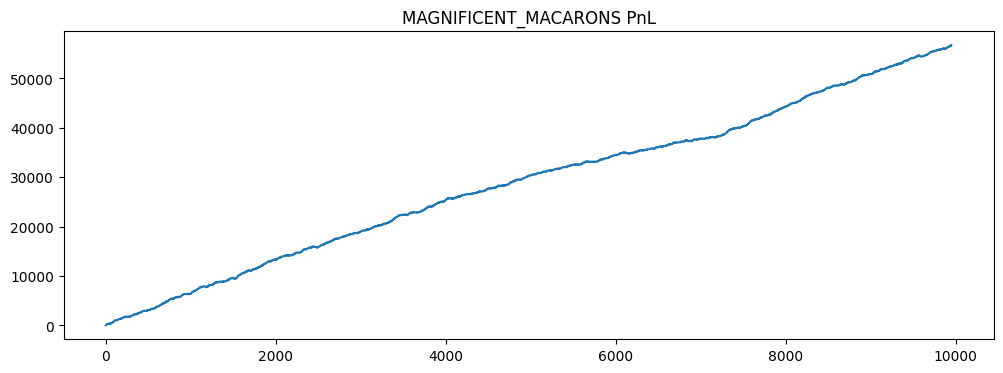

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'MAGNIFICENT_MACARONS']['profit_and_loss'].to_numpy())
plt.title('MAGNIFICENT_MACARONS PnL')
plt.show()